In [1]:
library(readr)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



In [2]:
cruise=read_csv('COVID-19/Cruise/Diamond_Princess_dataset_dateWise_summary.csv')
hubei=read_csv('COVID-19/Hubei/Hubei_dataset_dateWise_summary.csv')
all = read_csv('COVID-19/World/World_dataset_dateWise_summary.csv')

Parsed with column specification:
cols(
  State = col_character(),
  Day = col_double(),
  Date = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Recovered = col_double(),
  Active.Cases = col_double(),
  Closed.Cases = col_double()
)

Parsed with column specification:
cols(
  State = col_character(),
  Day = col_double(),
  Date = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Recovered = col_double(),
  Active.Cases = col_double(),
  Closed.Cases = col_double()
)

Parsed with column specification:
cols(
  Location = col_character(),
  Day = col_double(),
  Date = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Recovered = col_double(),
  Active.Cases = col_double(),
  Closed.Cases = col_double()
)



In [3]:
head(cruise)
head(hubei)
head(all)

State,Day,Date,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases
Diamond Princess,1,21-01-2020,0,0,0,0,0
Diamond Princess,2,22-01-2020,0,0,0,0,0
Diamond Princess,3,23-01-2020,0,0,0,0,0
Diamond Princess,4,24-01-2020,0,0,0,0,0
Diamond Princess,5,25-01-2020,0,0,0,0,0
Diamond Princess,6,26-01-2020,0,0,0,0,0


State,Day,Date,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases
Hubei,1,21-01-2020,270,0,25,245,25
Hubei,2,22-01-2020,444,17,28,399,45
Hubei,3,23-01-2020,444,17,28,399,45
Hubei,4,24-01-2020,549,24,31,494,55
Hubei,5,25-01-2020,761,40,32,689,72
Hubei,6,26-01-2020,1058,52,42,964,94


Location,Day,Date,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases
World,1,21-01-2020,60,0,0,60,0
World,2,22-01-2020,111,0,0,111,0
World,3,23-01-2020,209,0,0,209,0
World,4,24-01-2020,392,0,0,392,0
World,5,25-01-2020,673,0,0,673,0
World,6,26-01-2020,1060,0,3,1057,3


In [4]:
cruise=cruise[,c('Day','Confirmed')]
hubei=hubei[,c('Day','Confirmed')]
all=all[,c('Day','Confirmed')]

In [5]:
# calculate the percent of the affected people
percent <- function(val){
    return((val*100)/Total)
}

In [6]:
Total = 3711 # cruise
cruise$'percent_affected' = apply(cruise[,'Confirmed'],1,percent)

Total = 60057550 # hubei
hubei$'percent_affected' = apply(hubei[,'Confirmed'],1,percent)

Total = 6360676224-3711 # world
all$'percent_affected' = apply(all[,'Confirmed'],1,percent)

In [7]:
dim(hubei)

[1] 50  3

In [8]:
hubei$'totalpop'=60057550
cruise$'totalpop'=3711
all$'totalpop'=6360676224-3711

In [9]:
tail(hubei)

Day,Confirmed,percent_affected,totalpop
45,67466,0.1123356,60057550
46,67592,0.1125454,60057550
47,67666,0.1126686,60057550
48,67707,0.1127369,60057550
49,67743,0.1127968,60057550
50,67760,0.1128251,60057550


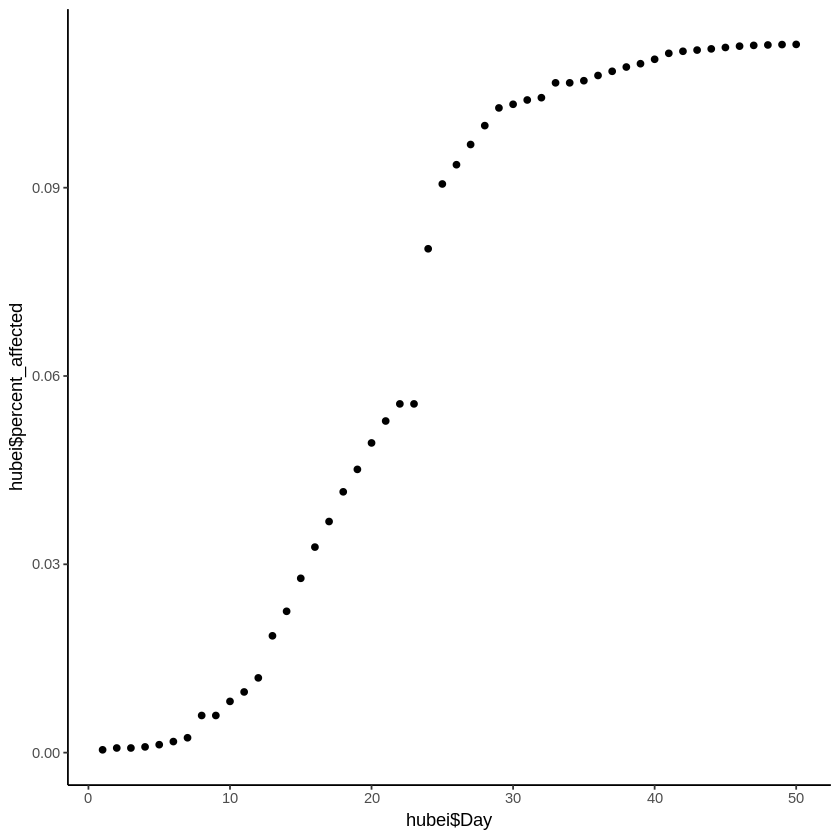

In [189]:
hubei.scatter.plot <- ggplot(hubei, aes(x = hubei$Day, y = hubei$percent_affected)) +
                        geom_point()
hubei.scatter.plot

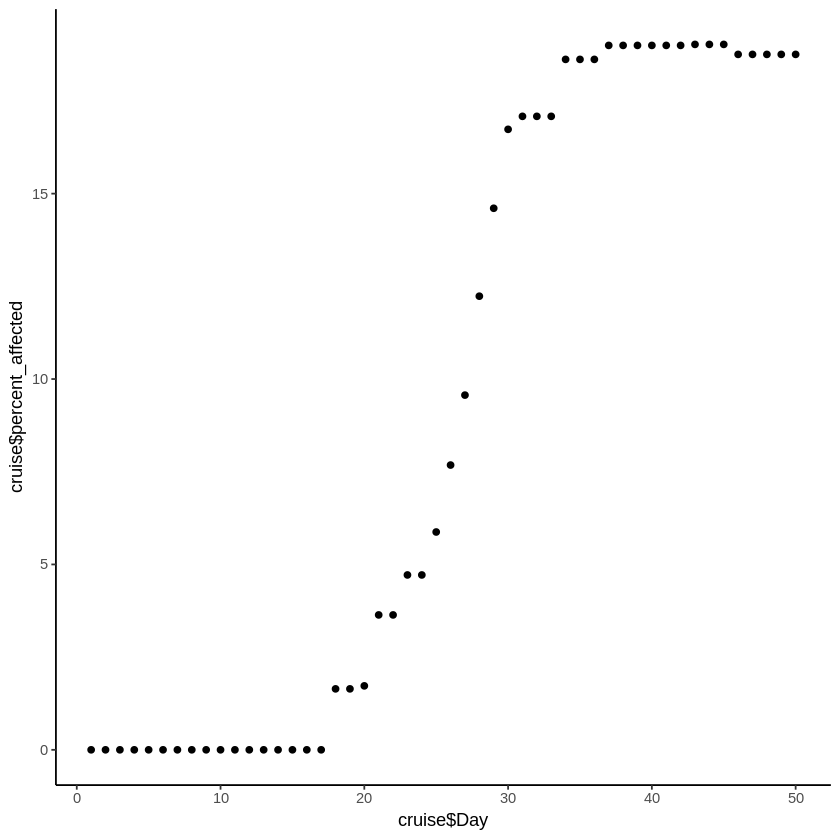

In [188]:
cruise.scatter.plot <- ggplot(cruise, aes(x = cruise$Day, y = cruise$percent_affected)) +
                        geom_point()
cruise.scatter.plot

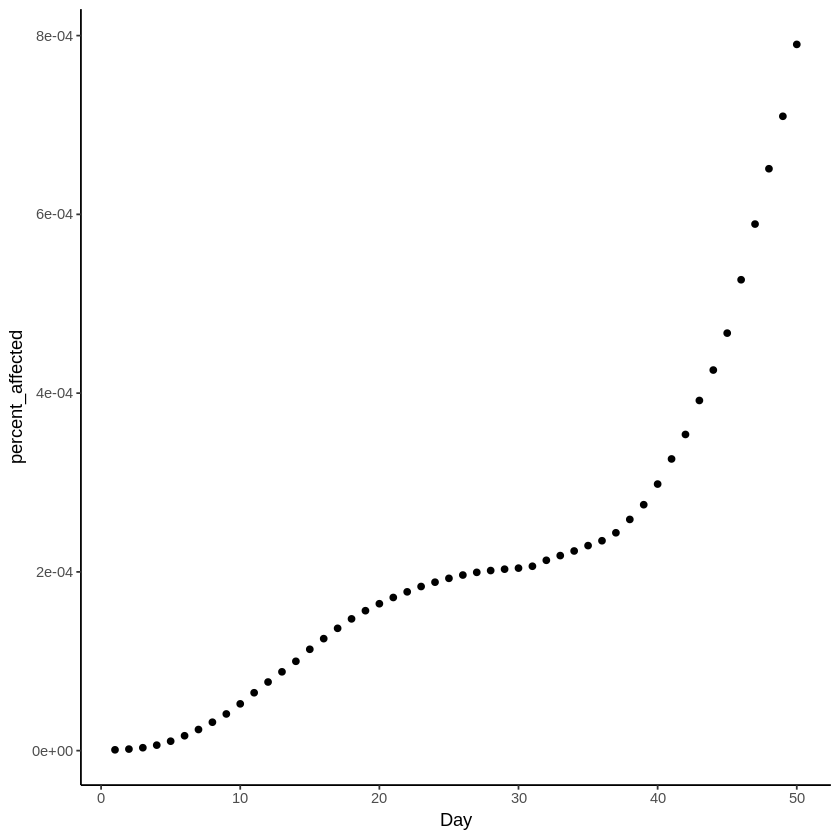

In [376]:
all.scatter.plot <- ggplot(all, aes(x = Day, y = percent_affected)) +
                        geom_point()
all.scatter.plot

In [13]:
tail(all)

Day,Confirmed,percent_affected,totalpop
45,29713,0.0004671361,6360672513
46,33511,0.0005268468,6360672513
47,37473,0.0005891358,6360672513
48,41411,0.0006510475,6360672513
49,45144,0.0007097363,6360672513
50,50259,0.0007901523,6360672513


# Data-Analysis

In [462]:
library(tidyverse)
library(caret)
theme_set(theme_classic())

In [463]:
set.seed(20) # generages same set of random sample every time
training.samples <- hubei$Day %>%
  createDataPartition(p = 0.8, list = FALSE)

train.data  <- hubei[training.samples, ]
test.data <- hubei[-training.samples, ]

In [464]:
head(train.data)
head(test.data)

dim(train.data)
dim(test.data)

Day,Confirmed,percent_affected,totalpop
2,444,0.0007392909,60057550
3,444,0.0007392909,60057550
4,549,0.0009141232,60057550
5,761,0.0012671180,60057550
6,1058,0.0017616436,60057550
7,1423,0.0023693940,60057550


Day,Confirmed,percent_affected,totalpop
1,270,0.0004495688,60057550
12,7153,0.0119102428,60057550
23,33366,0.0555567119,60057550
24,48206,0.0802663445,60057550
28,59989,0.0998858595,60057550
37,65187,0.1085408912,60057550


[1] 42  4

[1] 8 4

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



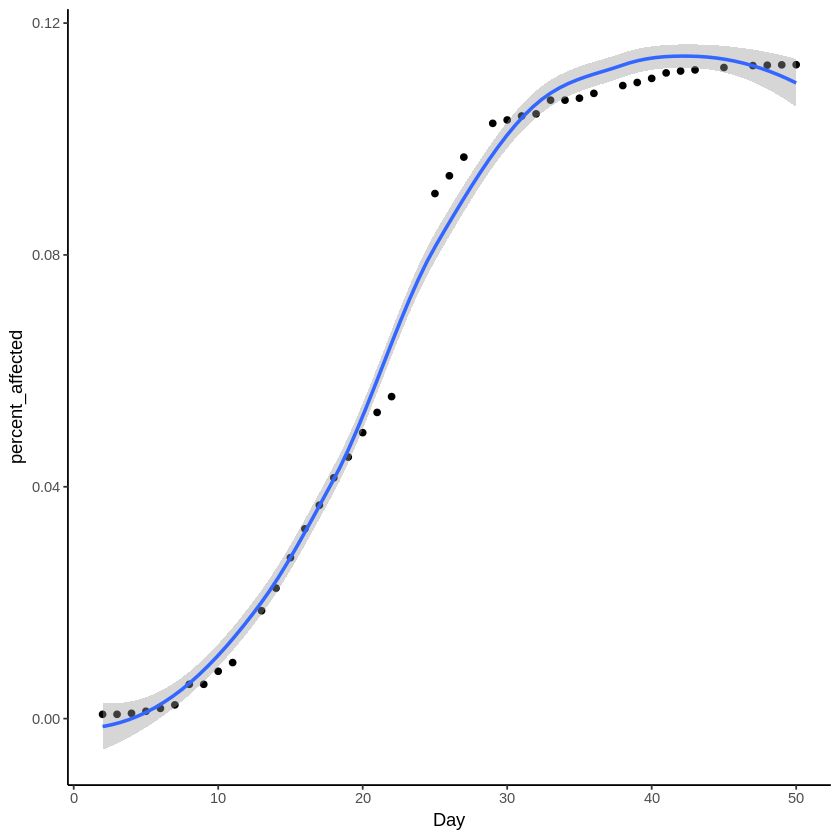

In [465]:
ggplot(train.data, aes(Day, percent_affected) ) +
  geom_point() +
  stat_smooth()

#### Linear regression {linear-reg}

In [466]:
# a regrassion for polynomial reg. eq. --> 
# y = x + I(x^2)...

# Build the model
model <- lm(Day ~ percent_affected, data = train.data)

In [467]:
# Make predictions
predictions <- model %>% predict(test.data)

In [468]:
# Model performance
data.frame(
  RMSE = RMSE(predictions, test.data$Day),
  R2 = R2(predictions, test.data$Day)
)

RMSE,R2
4.814445,0.8930732


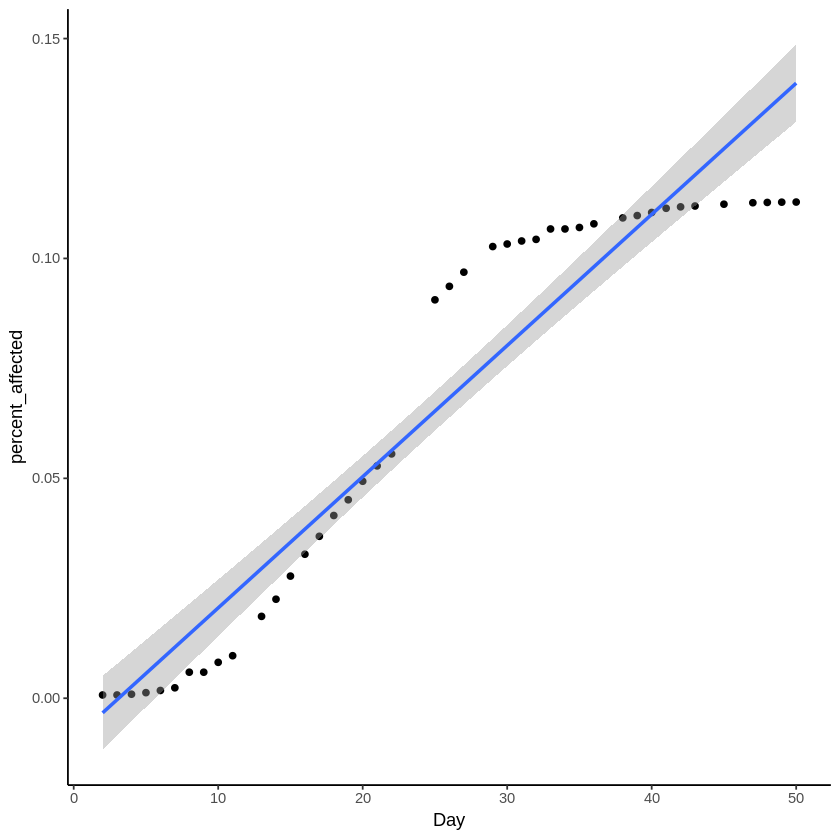

In [469]:
ggplot(train.data, aes(Day, percent_affected) ) +
  geom_point() +
  stat_smooth(method = lm, formula = y ~ x)

#### Polynomial regression

In [488]:
deg = 20

In [496]:
# a regrassion for polynomial reg. eq. --> 
# y = x + I(x^2)...

# lm(medv ~ Day + I(Day^2), data = train.data)

# better and alternate way for line i.e. above
lm(percent_affected ~ poly(Day, deg, raw = TRUE), data = train.data)
fit = lm(percent_affected ~ poly(Day, deg, raw = TRUE), data = train.data)


Call:
lm(formula = percent_affected ~ poly(Day, deg, raw = TRUE), data = train.data)

Coefficients:
                 (Intercept)   poly(Day, deg, raw = TRUE)1  
                  -2.184e-01                     3.137e-01  
 poly(Day, deg, raw = TRUE)2   poly(Day, deg, raw = TRUE)3  
                  -1.816e-01                     5.689e-02  
 poly(Day, deg, raw = TRUE)4   poly(Day, deg, raw = TRUE)5  
                  -1.090e-02                     1.369e-03  
 poly(Day, deg, raw = TRUE)6   poly(Day, deg, raw = TRUE)7  
                  -1.174e-04                     7.033e-06  
 poly(Day, deg, raw = TRUE)8   poly(Day, deg, raw = TRUE)9  
                  -2.977e-07                     8.860e-09  
poly(Day, deg, raw = TRUE)10  poly(Day, deg, raw = TRUE)11  
                  -1.807e-10                     2.362e-12  
poly(Day, deg, raw = TRUE)12  poly(Day, deg, raw = TRUE)13  
                  -1.612e-14                            NA  
poly(Day, deg, raw = TRUE)14  poly(Day, deg, 

In [490]:
# Make predictions
predictions <- model %>% predict(train.data)
#predictions

In [491]:
# Model performance
data.frame(
  RMSE = RMSE(predictions, train.data$Day),
  R2 = R2(predictions, train.data$Day)
)

RMSE,R2
4.423086,0.9057455


Warning message in predict.lm(model, newdata = data.frame(x = xseq), se.fit = se, :
“prediction from a rank-deficient fit may be misleading”


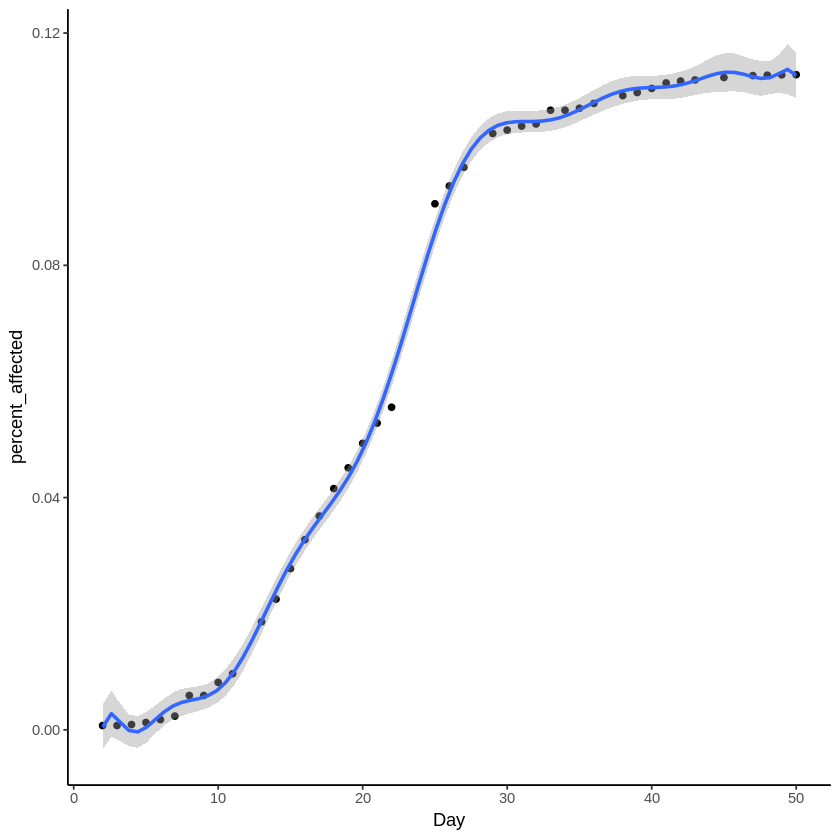

In [495]:
ggplot(train.data, aes(Day, percent_affected) ) +
  geom_point() +
  stat_smooth(method = lm, formula = y ~ poly(x, deg, raw = TRUE))

#### Log Transformation

In [307]:
# Build the model
model <- lm(Day ~ log(percent_affected), data = train.data)

In [308]:
# Make predictions
predictions <- model %>% predict(test.data)

In [309]:
# Model performance
data.frame(
  RMSE = RMSE(predictions, test.data$Day),
  R2 = R2(predictions, test.data$Day)
)

RMSE,R2
7.651882,0.7354638


ggplot(train.data, aes(Day, percent_affected) ) +
  geom_point() +
  stat_smooth(method = lm, formula = y ~ log(x))

In [501]:
head(train.data)

Day,Confirmed,percent_affected,totalpop
2,444,0.0007392909,60057550
3,444,0.0007392909,60057550
4,549,0.0009141232,60057550
5,761,0.0012671180,60057550
6,1058,0.0017616436,60057550
7,1423,0.0023693940,60057550


In [503]:
fit = lm(percent_affected ~ ., data = train.data)

In [498]:
data2 = data.frame(x=c(5:11))

In [505]:
predict(fit, test.data)

Warning message in predict.lm(fit, test.data):
“prediction from a rank-deficient fit may be misleading”


1            2            3            4            5            6 
0.0004495688 0.0119102428 0.0555567119 0.0802663445 0.0998858595 0.1085408912 
           7            8 
0.1121124655 0.1125453836